# Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

import os

In [2]:
import models
import utils

# GPU

In [3]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '4'
print(torch.cuda.device_count())

1


# Data

In [4]:
coldplay = utils.read_file("data/coldplay.txt")

# Model

In [5]:
seq_len = 128
hidden_size = 512
learning_rate = 1e-3
num_epochs = 128

In [6]:
model = models.LSTM(utils.num_letters, hidden_size, utils.num_letters)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
model.train(coldplay, seq_len, criterion, optimizer, num_epochs=num_epochs)

Epoch 1 loss: 3.3004473000764847, 1 minute(s) 16 second(s) elapsed
Epoch 2 loss: 3.151957180351019, 2 minute(s) 20 second(s) elapsed
Epoch 3 loss: 3.1427246034145355, 3 minute(s) 22 second(s) elapsed
Epoch 4 loss: 3.0160950496792793, 4 minute(s) 26 second(s) elapsed
Epoch 5 loss: 2.827669847756624, 5 minute(s) 34 second(s) elapsed
Epoch 6 loss: 2.6171288155019283, 6 minute(s) 42 second(s) elapsed
Epoch 7 loss: 2.5195595547556877, 7 minute(s) 44 second(s) elapsed
Epoch 8 loss: 2.454307723790407, 8 minute(s) 50 second(s) elapsed
Epoch 9 loss: 2.400856241583824, 9 minute(s) 51 second(s) elapsed
Epoch 10 loss: 2.311233513057232, 10 minute(s) 55 second(s) elapsed
Epoch 11 loss: 2.250518813729286, 11 minute(s) 56 second(s) elapsed
Epoch 12 loss: 2.2093729116022587, 12 minute(s) 57 second(s) elapsed
Epoch 13 loss: 2.1901248935610056, 13 minute(s) 59 second(s) elapsed
Epoch 14 loss: 2.1552391555160284, 15 minute(s) 6 second(s) elapsed
Epoch 15 loss: 2.125521684065461, 16 minute(s) 11 second(s)

Epoch 120 loss: 1.1416393551044166, 127 minute(s) 46 second(s) elapsed
Epoch 121 loss: 1.1477104355581105, 128 minute(s) 50 second(s) elapsed
Epoch 122 loss: 1.0753732742741704, 129 minute(s) 53 second(s) elapsed
Epoch 123 loss: 1.0337375204544514, 130 minute(s) 56 second(s) elapsed
Epoch 124 loss: 1.110706075327471, 132 minute(s) 1 second(s) elapsed
Epoch 125 loss: 1.0984607487916946, 133 minute(s) 4 second(s) elapsed
Epoch 126 loss: 1.120080773718655, 134 minute(s) 6 second(s) elapsed
Epoch 127 loss: 1.0373962270095944, 134 minute(s) 59 second(s) elapsed
Epoch 128 loss: 1.0692623062059283, 135 minute(s) 52 second(s) elapsed


In [11]:
torch.save(model.state_dict(), "results/trained-models/LSTM-Coldplay")
np.save("results/loss-histories/LSTM-Coldplay", model.loss_history)

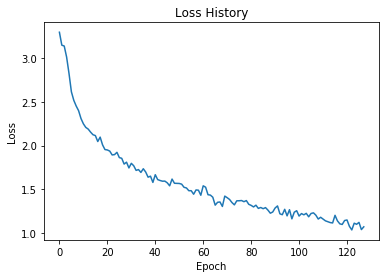

In [8]:
plt.plot(model.loss_history)
plt.title("Loss History")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [ ]:
print(model.generate(2048))